# Finding The Best Markets to Advertise an E-learning Product In

## Introduction
> In today's world e-learning has become an integral part of the academic domain. All learning resources have been digitalized and one's desire to learn is only a click away. Attending a physical institution is the way of the past while learning in the comfort of your own home has become somewhat of the new norm. Today, the value of a university degree is diminishing, as it isn't always a clear indicator of an individual’s skill and knowledge. With the education system evolving, students seek online resources that provide them with the same or more knowledge and skillset a university would at the fraction of the cost. This alternate route has become increasingly popular as it has proven to be a means of landing a job without the hassle of a loan. With this new trend comes an opportunity for education providers to adapt and capitalize on this new era of teaching. Throughout this project will be working with a survey dataset sourced from "freeCodeCamp" that contains information regarding the interests of new coders. Our client has asked us to recommend to them profitable markets for them to advertise in. The aim of this project is to find such markets and more specifically answer the following questions:
> - Which countries have the highest densities of new coders?
> - How much are new coders willing to spend?
> - Which domain of courses should we advertise in for each selected market?

> The first part of this notebook will focus on exploring and cleaning the data, while the second part will center on analyzing the data and answering the above questions.

In [1]:
# Importing the Libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)
pd.set_option("display.max_rows", None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading in the data
survey_data = pd.read_csv("/Users/omarstinner/Data Files/Python Projects/Files/Guided Project - Finding the Best Markets to Advertise In/2017-fCC-New-Coders-Survey-Data.csv")

## Part 1: Exploring and Cleaning The Data

### Exploring

In [3]:
print(survey_data.info(verbose = True, null_counts = True))
survey_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 136 columns):
 #    Column                         Non-Null Count  Dtype  
---   ------                         --------------  -----  
 0    Age                            15367 non-null  float64
 1    AttendedBootcamp               17709 non-null  float64
 2    BootcampFinish                 1069 non-null   float64
 3    BootcampLoanYesNo              1079 non-null   float64
 4    BootcampName                   949 non-null    object 
 5    BootcampRecommend              1073 non-null   float64
 6    ChildrenNumber                 2314 non-null   float64
 7    CityPopulation                 15354 non-null  object 
 8    CodeEventConferences           1609 non-null   float64
 9    CodeEventDjangoGirls           165 non-null    float64
 10   CodeEventFCC                   1708 non-null   float64
 11   CodeEventGameJam               290 non-null    float64
 12   CodeEventGirlDev              

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

> Looking at the brief summary of the dataset, we can already notice there is an excess amount of columns (135 columns) that do not pertain to the questions at hand. We see columns that represent questions of the "Yes and No" nature have been coded with numbers. This is ideal as it will allow us to quickly perform sum mathematical operations on them should we need to. We see that there are some demographic questions, work-related questions, platform preference questions, etc. We all so see that a lot of the columns are populated with null values. For survey data this is quite normal as there some questions of the type: "Select which applies to you", meaning that a lot of the cells will be left empty. It seems as though the correct data types have been assigned to the columns. The column names are all in camel case, which we will change to snake case for ease of read and accessibility. Let us further explore the "JobRoleInterest" so we can get a better picture of what types of job people are intrerested in, which will inturn inform us about the courses surveyees are interested in.

In [4]:
# Finding out which jobs pepople are interested in
job_interest = pd.DataFrame(survey_data["JobRoleInterest"].value_counts(normalize = True, ascending = False) * 100)
display(job_interest[job_interest["JobRoleInterest"] > 1])

# Understanding if individuals have multiple job interests or single job interests
single_mixed_jobs = pd.DataFrame(survey_data["JobRoleInterest"].dropna())
single_mixed_jobs["job_num"] = single_mixed_jobs["JobRoleInterest"].apply(lambda x : len(x.split(",")) if "," in x else 1)
display(single_mixed_jobs["job_num"].value_counts(normalize = True, ascending = False) * 100)

,JobRoleInterest
Full-Stack Web Developer,11.770595
Front-End Web Developer,6.435927
Data Scientist,2.173913
Back-End Web Developer,2.030892
Mobile Developer,1.673341
Game Developer,1.630435
Information Security,1.315789


1     31.650458
3     15.889588
4     15.217391
5     12.042334
2     10.883867
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
12     0.300343
11     0.185927
13     0.028604
Name: job_num, dtype: float64

> As we can see, the most popular courses amongst individuals are "Full-Stack Web Developer Courses", which indicates that people around the world are interested in becoming well equiped for Web Development jobs. In general, it seems like Web Development, whether it is "backend" or "frontend" is also quite popular. Data Science also makes an appearance as one of the most popular job interests. These Statistics have been generated from data sourced from 2017 and so we could very well see the proportion of people interested in Data Science roles increase today as its popularity increases. We mostly see that the people are interested in only one type of job role, however, there is still quite a number of people who have more than one job interest - they possibly still haven't settled on the type of job they are interested in. In the next cell, we will lightly clean the dataset selecting only the columns we need and converting their names from camel case to snake case.

### Cleaning

In [5]:
# Selecting columns
selected_columns = ["JobRoleInterest", "CountryLive", "AttendedBootcamp","MonthsProgramming", "MoneyForLearning"]
selected_columns.extend([col for col in survey_data.columns if "JobInterest" in col])
survey_data = survey_data[selected_columns]

# Changing the column names
survey_data.columns = ['job_role_interest', 'country_live', 'attended_bootcamp', 'months_programming', 'money_for_learning', 
 'job_interest_backend', 'job_interest_data_engr', 'job_interest_data_sci', 'job_interest_dev_ops', 
 'job_interest_frontend', 'job_interest_full_stack', 'job_interest_game_dev', 'job_interest_info_sec',
 'job_interest_mobile', 'job_interest_other', 'job_interest_proj_mngr', 'job_interest_qa_engr', 'job_interest_ux']

## Part 2: Analyzing The Data

### Which locations have the highest denisities of new coders?

In [6]:
not_null = survey_data[~survey_data["job_role_interest"].isnull()]

country_live_absolute = not_null["country_live"].value_counts(ascending = False)
country_live_relative = not_null["country_live"].value_counts(ascending = False, normalize = True) * 100

country_live_freq = pd.DataFrame({ "country_live_absolute" : country_live_absolute,
                                   "country_live_relative" : country_live_relative})

country_live_freq

,country_live_absolute,country_live_relative
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


> When we talk about "markets", we are reffering to countries. We can see above that when we calculate the count of new coders in each country, The USA trumps all the other countries in terms of the frequency of new coders. The USA has around six times more new coders than second-place India. It is quite interesting that the UK, Canada, and Germany all have fewer new coders considering they're economically and technologically superior to India. However, India is indeed known to promote Information Technology in the country, with a lot of System Engineers hailing from India. As of now, it seems like the USA, India, UK, Canada, and Poland are prospective markets. Moving forwards, we will be focusing our analysis on these markets. We will also be analyzing individuals who have the propensity to spend.

### How much are new coders willing to spend?

In [7]:
# Selecting individuals wh have not attended a bootcamp and who are also from the top 5 new coder centeric countries
selected_countries_no_bc = survey_data[(survey_data["attended_bootcamp"] == 0) & (survey_data["country_live"].apply(lambda x : True if x in country_live_freq[:5].index else False))]
selected_countries_no_bc["country_live"].value_counts(ascending = True)

# Creating a column that shows the monthly spending for each individual
selected_countries_no_bc["months_programming"].replace(0,1, inplace = True)

selected_countries_no_bc["monthly_spend"] = selected_countries_no_bc["money_for_learning"] / selected_countries_no_bc["months_programming"]

selected_countries_no_bc = selected_countries_no_bc[selected_countries_no_bc["monthly_spend"].notnull()]

,United States of America,India,United Kingdom,Canada,Poland
count,4882.000000,1197.000000,676.000000,522.000000,237.000000
mean,113.539686,64.228078,35.117548,48.999398,75.067106
std,1653.943586,442.790160,181.688742,190.952267,666.056871
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.666667,0.000000,0.488095,0.000000,0.555556
75%,25.000000,8.333333,16.666667,16.666667,17.857143
max,80000.000000,10000.000000,3500.000000,2000.000000,10000.000000


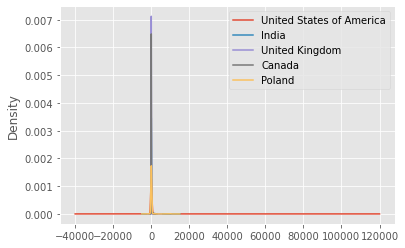

In [8]:
# Creating a descriptive statistics table for each country reagarding their monthly spending
country_spend_stats = pd.DataFrame()

for country in selected_countries_no_bc["country_live"].value_counts().index:
    stats = selected_countries_no_bc[selected_countries_no_bc["country_live"] == country]["monthly_spend"].describe()
    if country_spend_stats.shape[0] == 0:
        country_spend_stats = pd.DataFrame(stats)
    else:
        country_spend_stats = country_spend_stats.merge(stats, left_index = True, right_index = True)
        
country_spend_stats.columns = selected_countries_no_bc["country_live"].value_counts().index
display(country_spend_stats)

# Plotting the distributions for monhtly spending for each country
plt.style.use("ggplot")
for country in country_spend_stats.columns:
    selected_countries_no_bc[selected_countries_no_bc["country_live"] == country]["monthly_spend"].plot.kde(label = country, legend = True)
    
plt.show()

> Looking at the above table, we see our data is too scattered for all countries for us to make an informed decision. This is probably due to the fact that we have a lot of individuals who do not pay for courses and instead just use free platforms for their learning needs. However, as the data stands, we see that most of the individuals for each country do not pay for courses. This is quite evident in the graph as all the distributions only peak at a "monthly_spend" of 0 dollars. We also see that the median "monthy_spend" for each country is either 0 dollars or very close to 0. We also see that there are many outliers present in the data for all our countries as there are individuals who are paying 80,000 dollars a month on education, which doesn’t seem right considering we got rid of people who attended bootcamps. Tuition for university isn't even this much. The remaining countries also exhibit similar outlier trends. However, we can somewhat get a feel for how much people are willing to spend. In the United States, 75% of new coders spend 25 dollars or less, while in India 75% of new coders spend 8.3 dollars or less. This is understandable considering the stark difference in socio-economic statuses between the two countries. We see that the average "monthly_spend" in the USA is the highest of the five, with new coders spending 113 per month - this is also unlikely and is probably influenced by outliers. In the next cell, we will remove outliers and people who do not spend to reach thorough and accurate conclusions. Removing individuals who don't spend is also justifiable as keeping them in our dataset does not help answer our questions.

In [9]:
# Removing outliers and indiviudals who don't spend

# Removing outliers from out data
no_outliers = pd.DataFrame()

for country in country_spend_stats.columns:    
    iqr = country_spend_stats.loc["75%", country] - country_spend_stats.loc["25%", country]
    
    lower_bound = country_spend_stats.loc["25%", country] - (iqr * 1.5)
    upper_bound = country_spend_stats.loc["75%", country] + (iqr * 1.5)
    
    country_data = selected_countries_no_bc[selected_countries_no_bc["country_live"] == country]
    country_no_outliers = country_data[(country_data["monthly_spend"] > lower_bound) & (country_data["monthly_spend"] < upper_bound)]
    
    no_outliers = no_outliers.append(pd.DataFrame(country_no_outliers))

# Removing individuals who don't spend
no_outliers_spend = no_outliers[no_outliers["monthly_spend"] != 0]

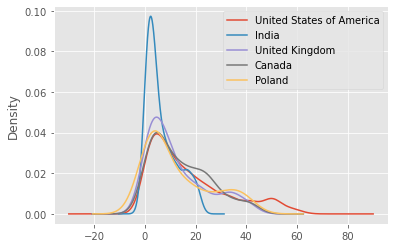

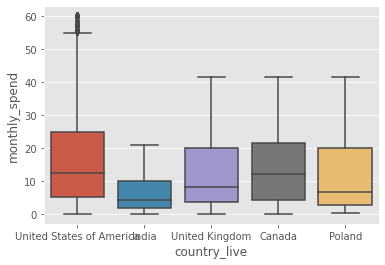

,United States of America,India,United Kingdom,Canada,Poland
count,1864.000000,322.000000,250.000000,181.000000,89.000000
mean,17.264866,6.597264,12.542443,14.131394,12.944161
std,15.385398,5.984072,11.550683,11.296777,12.794775
min,0.016667,0.050000,0.050000,0.087719,0.166667
25%,5.000000,1.666667,3.664773,4.166667,2.777778
50%,12.500000,4.166667,8.333333,12.000000,6.666667
75%,25.000000,10.000000,20.000000,21.428571,20.000000
max,60.000000,20.833333,41.666667,41.666667,41.666667


(54.002, 60.0]       2.521459
(48.003, 54.002]     5.633047
(42.005, 48.003]     1.287554
(36.007, 42.005]     4.560086
(30.008, 36.007]     5.364807
(24.01, 30.008]      9.012876
(18.012, 24.01]      7.993562
(12.013, 18.012]    14.914163
(6.015, 12.013]     18.723176
(-0.0443, 6.015]    29.989270
Name: monthly_spend, dtype: float64

In [10]:
# Examining the Distribution for each country's monthly spending
for country in no_outliers_spend["country_live"].value_counts().index:
    no_outliers_spend[no_outliers_spend["country_live"] == country]["monthly_spend"].plot.kde(label = country, legend = True)
plt.show()

# Examining to further see if there are any outliers
sns.boxplot(x = "country_live", y = "monthly_spend", data = no_outliers_spend)
plt.show()

# Calculating the new descriptive statistics for our data
no_outliers_spend_stats = pd.DataFrame()

for country in selected_countries_no_bc["country_live"].value_counts().index:
    stats = no_outliers_spend[no_outliers_spend["country_live"] == country]["monthly_spend"].describe()
    if no_outliers_spend_stats.shape[0] == 0:
        no_outliers_spend_stats = pd.DataFrame(stats)
    else:
        no_outliers_spend_stats = no_outliers_spend_stats.merge(stats, left_index = True, right_index = True)
        
no_outliers_spend_stats.columns = no_outliers_spend["country_live"].value_counts().index
display(no_outliers_spend_stats)

# Examining the different intervals for spending to see tabularly where the majortity fall
no_outliers_spend[no_outliers_spend["country_live"] == "United States of America"]["monthly_spend"].value_counts(bins = 10, normalize = True).sort_index(ascending = False) * 100

> We can see that removing the outliers and people who do not spend greatly influenced our data. The information presented above seems more accurate allowing us to reach more accurate conclusions. In the Distribution graph, we can now clearly see the differences in monthly spending distributions between all the countries. They are all similar in one regard where they are all skewed right - this is normal considering the nature of the data in the "monthly_spend" has a lower bound of 0 - because we cannot have negative spending. We see that for India the majority of individuals spend near 0 dollars, this is also evident in the box plot and table where we see its mean and median close to 7 dollars. We also see that India does not spend more than around 20 dollars. Although we do see the majority of individuals spend close to around 6 dollars per month, they have the longest right tail showing that they have the highest spenders of the five countries. There are some people who spend roughly around 60 dollars on e-learning platofrms in the United States. However, we do see that the United States has a couple of outliers who spend more than 50 dollars. These outliers weren't large enough for us to omit from the dataset. In general, The three remaining countries perform quite similarly where they all share similar statistics. Their distributions are quite similar, showing that each country have similar spending habits on e-learning platforms. We see that for all these three countries they don't spend more than around 42 dollars and individuals on average spend around 13 dollars. The largest difference between these three countries is the median - Canada has the largest median of 12 dollars, while the UK and Poland have 8.3 dollars and 6.6 dollars respectively. In the next couple of cells, we are going to calculate the z scores for each individual for their monthly expenditures with respect to their country, so that we can see the typical amount an individual spends in their country. The Majority will fall within one standard deviation of the mean spending amount - this will help our client with their pricing strategy.

In [11]:
# Creating a z score function
def z_score(row):
    mean = no_outliers_spend[no_outliers_spend["country_live"] == row["country_live"]]["monthly_spend"].mean()
    std_dev = np.std(no_outliers_spend[no_outliers_spend["country_live"] == row["country_live"]]["monthly_spend"])
    
    z = (row["monthly_spend"] - mean) / std_dev
    
    return z

# Creating a new column that calcualtes the z score of an individuals monthly spending realtive to the individual's country
no_outliers_spend["z_score_monthly_spend"] = no_outliers_spend.apply(z_score, axis = 1)

In [12]:
# Selecting z scores that are within 1 SD
monthly_spend_zscore_one = no_outliers_spend[no_outliers_spend["z_score_monthly_spend"] <= 1]

# Calculating the min and max people spend each month who have a z score of 1
min_spend = monthly_spend_zscore_one.groupby("country_live")["monthly_spend"].min()
max_spend = monthly_spend_zscore_one.groupby("country_live")["monthly_spend"].max()

min_max_spend = pd.DataFrame(min_spend).merge( pd.DataFrame(max_spend), left_index = True, right_index = True)
min_max_spend.columns = ["min_spend", "max_spend"]

min_max_spend

,min_spend,max_spend
country_live,,
Canada,0.087719,25.000000
India,0.050000,12.500000
Poland,0.166667,25.000000
United Kingdom,0.050000,23.333333
United States of America,0.016667,32.500000


> As we can see hereafter gathering all the individuals who fell within 1 Standard Deviation of the mean "monthly_spend", Americans tend to spend the most. Those who are willing to spend more in the United States will typically spend around 32.5 dollars. Again we see Canada, Poland, and the UK perform similarly with their high spenders typically spending around 23 dollars to 25 dollars. As expected, due to socio-economic factors we see India spending the least, with their typical high spenders spending no more than 12.5 dollars.

### Which domain of courses should we promote/advertise for each selected market?

In [13]:
top_5_job_interests = pd.DataFrame()

for country in no_outliers_spend_stats.columns:
    country_top_5 = no_outliers_spend.loc[no_outliers_spend["country_live"] == country ,[col for col in survey_data.columns if "job_interest" in col]].sum().sort_values(ascending = False)[:5]
    country_top_5 = pd.DataFrame(country_top_5)
    country_top_5.columns = [country]
    display(country_top_5)

,United States of America
job_interest_full_stack,612.0
job_interest_frontend,499.0
job_interest_backend,420.0
job_interest_mobile,325.0
job_interest_data_sci,229.0


,India
job_interest_full_stack,71.0
job_interest_backend,44.0
job_interest_frontend,42.0
job_interest_mobile,37.0
job_interest_data_sci,34.0


,United Kingdom
job_interest_frontend,55.0
job_interest_full_stack,51.0
job_interest_backend,34.0
job_interest_mobile,30.0
job_interest_data_sci,20.0


,Canada
job_interest_full_stack,44.0
job_interest_frontend,41.0
job_interest_backend,28.0
job_interest_mobile,21.0
job_interest_data_sci,20.0


,Poland
job_interest_frontend,24.0
job_interest_full_stack,22.0
job_interest_backend,17.0
job_interest_mobile,9.0
job_interest_game_dev,8.0


> We see that all countries have very similar top 5 job interests. The United States, United Kingdom, India, and Canada all share the same top 5 job interest preferences, just in different orders. USA, India, and Canada all prefer full-stack development over the front end and backend. With regards to frontend and backend, USA and Canada prefer frontend, while India prefers backend. As mentioned previously, in India there are a lot of system engineers and people who work in information technology, these findings are coherent with this logic as backend development is more geared towards databases and systems while frontend development is more concerned with design and user interface. For the remaining job interests, we see Data Science fall last and mobile development place second to last. Poland on the other hand is not interested in Data Science, but rather has a preference for game development. Poland also has a similar order as the other 5 countries for its top 4 job interests. Only The top 5 job interests in each country are being displayed for advertising selection purposes and so all of the displayed interests should be regarded as very popular and good candidates for the types of courses our clients should advertise in.

## Conclusion
> We can conclude that the best markets to advertise in that will yield promising profits are both North American countries - The United States of America and Canada, and both European countries - The United Kingdom and Poland. We can expect the biggest profits from the United States since their highest spenders spend around 32 dollars a month on e-learning platforms. Canada, The United Kingdom, and Poland all have the same typical high spender with individuals spending around 24 dollars a month. Although this is significantly less than the United States, the opportunity is still promising. On the other hand, India does not seem like a profitable market as they don’t have typical spenders who spend beyond 12 dollars and so they are not a viable option unless advertising costs in India are low. The results also suggest that our client should be looking to set different prices for different countries - people have different propensities to spend across the analyzed countries. Unless our client can prove they have an edge over other e-learning platforms then they should stick to above listed "typical" prices of the average spender. Should they not, they could end up spending lots of money on advertising only to get no customers in return as their prices would be above the country market price. The e-learning space has become very popular and competition is high, lower prices tend to always garner attention, especially when they have good reviews - a great influencer of how well e-learning platforms perform. Lastly, our client should advertise in areas that center mostly around full-stack, frontend, and backend development as they have been the most popular "Job Interests" across all countries.

In [14]:
%%html
<style>
.nbviewer div.output_area {
  overflow-y: auto;
  max-height: 400px;
}
</style>